In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
xdf = pd.read_csv('./Training/Logistic_X_Train.csv')
ydf = pd.read_csv('./Training/Logistic_Y_Train.csv')


x = xdf.values
x=(x-x.mean())/x.std()
y = ydf.values
y=y.reshape((3000,))

In [3]:
xtest = pd.read_csv('./Testing/Logistic_X_Test.csv')
xtest = xtest.values
print(xtest)

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [4]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

def sigmoid(h):#feeding the hypothesis in sigmoid function
    return 1.0/(1.0 + np.exp(-1.0*h))


def error(y,x,w,b):#calculating error for each iteration
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m


def get_grad(x,w,b,y):#calculating gradient
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]   

def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

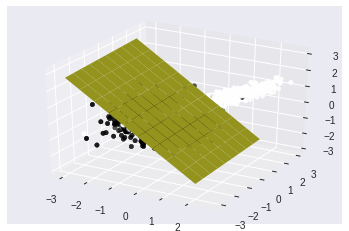

In [8]:
W=np.array([0.0,0.0,0.0])
b=0.0
loss=[]
for i in range(200):
    l,W,b = gradient_descent(x,y,W,b,learning_rate=0.01)
    
    loss.append(l)

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=y)#plotting data
x1=np.linspace(-3,2,10)
y1=np.linspace(-3,2,10)
x1,y1=np.meshgrid(x1,y1)
z1=-(W[0]*x1+W[1]*y1+b)/W[2]
ax.plot_surface(x1,y1,z1,color='#FFFF33')#plotting optimised plane
ax.scatter(x[:,0],x[:,1],x[:,2],c=y)
plt.show()